# Problem Statement

* Fake news detection is a hot topic in the field of natural language processing. We consume news through several mediums throughout the day in our daily routine, but sometimes it becomes difficult to decide which one is fake and which one is authentic. Our job is to create a model which predicts whether a given news is real or fake.

* Project Flow:
Problem Statement
Data Gathering
Data Preprocessing:Here we perform some operation on data A. Tokenization B. Lower Case C. Stopwords D. Lemmatization / Stemming
Vectorization (Convert Text data into the Vector): A. Bag of Words (CountVectorizer) B. TF-IDF
Model Building: A. Model Object Initialization B. Train and Test Model
Model Evaluation: A. Accuracy Score B. Confusion Matrix C. Classification Report
Model Deployment
Prediction on Client Data

# Required Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Gathering

In [2]:
real_data = pd.read_csv("True.csv", encoding='latin-1', on_bad_lines='skip')
real_data.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [3]:
fake_data = pd.read_csv("Fake.csv", encoding='latin-1', on_bad_lines='skip')
fake_data.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamas Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

# Data Analysis for Real Dataset

In [4]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21416 non-null  object
 1   text     21416 non-null  object
 2   subject  21416 non-null  object
 3   date     21416 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [5]:
real_data['Label'] = 1
real_data.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  Label  
0  December 31, 2017       1  
1  December 29, 2017       1  
2  December 31, 2017       1  
3  December 30, 2017       1  
4  December 29, 2017       1

In [6]:
real_data.shape

(21416, 5)

In [7]:
real_data.isnull().sum()

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

In [8]:
real_data[real_data.duplicated()]

title  \
445    Senate tax bill stalls on deficit-focused 'tri...   
778    Trump warns 'rogue regime' North Korea of grav...   
892    Republicans unveil tax cut bill, but the hard ...   
896    Trump taps Fed centrist Powell to lead U.S. ce...   
974    Two ex-Trump aides charged in Russia probe, th...   
...                                                  ...   
21227  France unveils labor reforms in first step to ...   
21262  Guatemala top court sides with U.N. graft unit...   
21289  Europeans, Africans agree renewed push to tack...   
21352  Thailand's ousted PM Yingluck has fled abroad:...   
21407  U.S., North Korea clash at U.N. forum over nuc...   

                                                    text       subject  \
445    WASHINGTON (Reuters) - The U.S. Senate on Thur...  politicsNews   
778    BEIJING (Reuters) - U.S. President Donald Trum...  politicsNews   
892    WASHINGTON (Reuters) - U.S. House of Represent...  politicsNews   
896    WASHINGTON (Reuters) - President Donald Trump ...  politicsNews   
974    WASHINGTON (Reuters) - Federal investigators p...  politicsNews   
...                                                  ...           ...   
21227  PARIS (Reuters) - French President Emmanuel Ma...     worldnews   
21262  GUATEMALA CITY (Reuters) - Guatemala s top cou...     worldnews   
21289  PARIS (Reuters) - Europe s  big four  continen...     worldnews   
21352  BANGKOK (Reuters) - Ousted Thai prime minister...     worldnews   
21407  GENEVA (Reuters) - North Korea and the United ...     worldnews   

                     date  Label  
445    November 30, 2017       1  
778     November 8, 2017       1  
892     November 2, 2017       1  
896     November 2, 2017       1  
974     October 30, 2017       1  
...                   ...    ...  
21227    August 31, 2017       1  
21262    August 29, 2017       1  
21289    August 28, 2017       1  
21352    August 25, 2017       1  
21407    August 22, 2017       1  

[206 rows x 5 columns]

In [9]:
# remove duplicates
real_data.drop_duplicates(inplace=True)

In [10]:
real_data.shape

(21210, 5)

In [11]:
real = real_data.drop(['title','subject','date'], axis = 1)
real.head()

text  Label
0  WASHINGTON (Reuters) - The head of a conservat...      1
1  WASHINGTON (Reuters) - Transgender people will...      1
2  WASHINGTON (Reuters) - The special counsel inv...      1
3  WASHINGTON (Reuters) - Trump campaign adviser ...      1
4  SEATTLE/WASHINGTON (Reuters) - President Donal...      1

# Data Preprocessing for Real Dataset

In [12]:
real['text']=real['text'].str.lower()

In [13]:
def clean_text(text):
    text = re.sub('@[\w]*', '', text)         # @
    text = re.sub("[0-9" "]+", '',text)       # no's
    text = re.sub('[‘’“”…]', '', text)       
    text = re.sub("\s+[a-z]\s+", " ",text)   #  a b c-----single letter
    text = re.sub("\W", " ", text)           #	*-+=)
    #text = re.sub('http[^\s]+', '',text)
    return text

clean = lambda x: clean_text(x)
real["clean_text"] = real["text"].apply(clean_text)


In [14]:
import nltk
nltk.download('punkt')  # You can remove this line if you already downloaded punkt before

text = "This is a sample sentence for tokenization."
tokens = nltk.word_tokenize(text)

print(tokens)


['This', 'is', 'a', 'sample', 'sentence', 'for', 'tokenization', '.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\finaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\finaz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\finaz\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
import nltk
nltk.download('punkt') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\finaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\finaz\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\finaz\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\finaz\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\finaz\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\finaz\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\finaz\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\finaz\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\finaz\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\finaz\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\finaz\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat

[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\finaz\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\finaz\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\finaz\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\finaz\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     C:\Users\finaz\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!

True

In [ ]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [15]:
# Tokenization
real['tokenized_text'] = [nltk.word_tokenize(x) for x in real['clean_text']]

#List of Stopwords
stop_words = list(set(stopwords.words('english')))

#Removing Stopwords
real['tokenized_text'] = real['tokenized_text'].apply(lambda row: [word for word in row if word not in stop_words])

#Stemming words
stemmer = PorterStemmer()
real['stem_text'] = real['tokenized_text'].apply(lambda x: [stemmer.stem(i) for i in x])
real['stem_text'] = real['stem_text'].apply(lambda x: ' '.join(x))
real.head()

text  Label  \
0  washington (reuters) - the head of a conservat...      1   
1  washington (reuters) - transgender people will...      1   
2  washington (reuters) - the special counsel inv...      1   
3  washington (reuters) - trump campaign adviser ...      1   
4  seattle/washington (reuters) - president donal...      1   

                                          clean_text  \
0  washington  reuters    the head of conservativ...   
1  washington  reuters    transgender people will...   
2  washington  reuters    the special counsel inv...   
3  washington  reuters    trump campaign adviser ...   
4  seattle washington  reuters    president donal...   

                                      tokenized_text  \
0  [washington, reuters, head, conservative, repu...   
1  [washington, reuters, transgender, people, all...   
2  [washington, reuters, special, counsel, invest...   
3  [washington, reuters, trump, campaign, adviser...   
4  [seattle, washington, reuters, president, dona...   

                                           stem_text  
0  washington reuter head conserv republican fact...  
1  washington reuter transgend peopl allow first ...  
2  washington reuter special counsel investig lin...  
3  washington reuter trump campaign advis georg p...  
4  seattl washington reuter presid donald trump c...

In [16]:
import string

# Define a function to remove punctuation from a text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))


In [17]:
# Remove punctuation from 'stem_text' column
real['stem_text'] = real['stem_text'].apply(remove_punctuation)

# Display the updated DataFrame
print(real.head())


                                                text  Label  \
0  washington (reuters) - the head of a conservat...      1   
1  washington (reuters) - transgender people will...      1   
2  washington (reuters) - the special counsel inv...      1   
3  washington (reuters) - trump campaign adviser ...      1   
4  seattle/washington (reuters) - president donal...      1   

                                          clean_text  \
0  washington  reuters    the head of conservativ...   
1  washington  reuters    transgender people will...   
2  washington  reuters    the special counsel inv...   
3  washington  reuters    trump campaign adviser ...   
4  seattle washington  reuters    president donal...   

                                      tokenized_text  \
0  [washington, reuters, head, conservative, repu...   
1  [washington, reuters, transgender, people, all...   
2  [washington, reuters, special, counsel, invest...   
3  [washington, reuters, trump, campaign, adviser...   
4  [

# Generate wordcloud for Real Dataset

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\finaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\finaz\AppData\Local\Temp\ipykernel_19428\2245601290.py:12: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('True.csv', encoding='ISO-8859-1', error_bad_lines=False)
b'Skipping line 11067: expected 4 fields, saw 8\n'


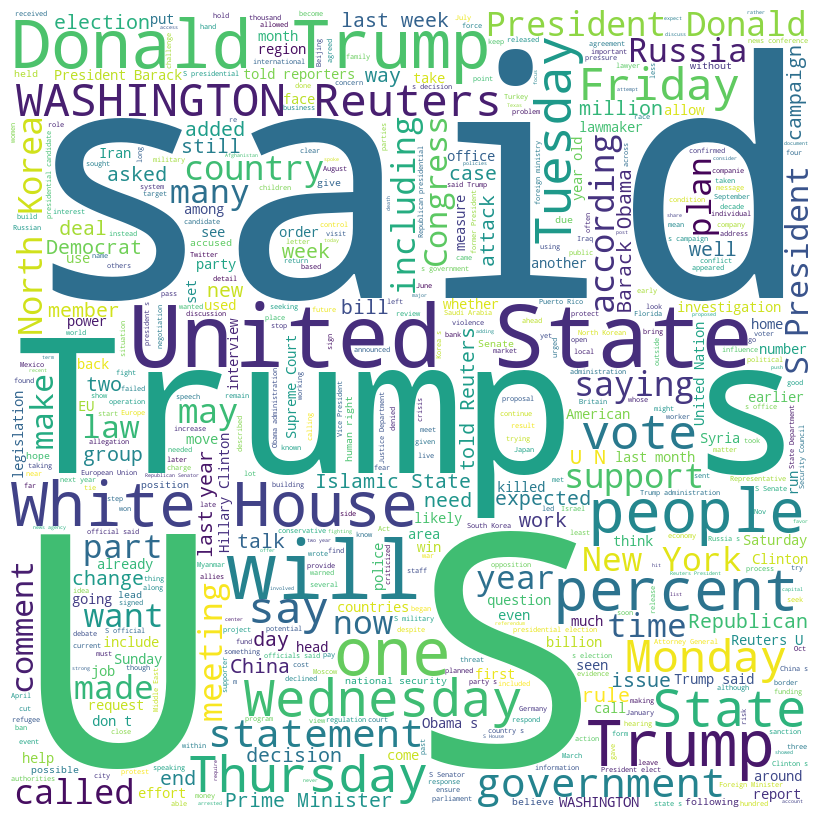

In [18]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from nltk.corpus import stopwords
nltk.download('stopwords')

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('True.csv', encoding='ISO-8859-1', error_bad_lines=False)


# Clean the data if needed (you can define a function for data cleaning)
def clean_data(text):
    # Your cleaning process here
    return text

real['text'] = real['text'].apply(clean_data)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=500).generate(' '.join(df['text']))

# Plot the WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# N-gram

In [19]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from nltk.corpus import stopwords
import pandas as pd

# Function to generate N-grams
def generate_ngrams(text, n):
    words = word_tokenize(text)
    n_grams = ngrams(words, n)
    return [' '.join(grams) for grams in n_grams]

# Create a list of stop words
stop_words = set(stopwords.words('english'))

# Assuming 'real' is the dataframe with 'tokenized_text' column
real['tokenized_text'] = real['tokenized_text'].apply(lambda lst: [word.lower() for word in lst])
# Convert text to lowercase

real['tokenized_text'] = real['tokenized_text'].apply(lambda x: ' '.join(x))
# Join the list of words back into a single string

real['tokenized_text'] = real['tokenized_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
# Remove stopwords

unigrams = real['tokenized_text'].apply(lambda x: generate_ngrams(x, 1))
bigrams = real['tokenized_text'].apply(lambda x: generate_ngrams(x, 2))
trigrams = real['tokenized_text'].apply(lambda x: generate_ngrams(x, 3))

unigram_freq = Counter([gram for sublist in unigrams for gram in sublist])
bigram_freq = Counter([gram for sublist in bigrams for gram in sublist])
trigram_freq = Counter([gram for sublist in trigrams for gram in sublist])

# Print N-gram frequencies
print("Unigram Frequencies:", unigram_freq.most_common(10))
print("Bigram Frequencies:", bigram_freq.most_common(10))
print("Trigram Frequencies:", trigram_freq.most_common(10))


Unigram Frequencies: [('said', 97866), ('trump', 54089), ('u', 44029), ('would', 31240), ('reuters', 28677), ('president', 27879), ('state', 20808), ('government', 18552), ('new', 16756), ('house', 16491)]
Bigram Frequencies: [('united states', 12021), ('donald trump', 10062), ('white house', 8333), ('washington reuters', 6643), ('president donald', 5875), ('north korea', 5509), ('new york', 4713), ('prime minister', 4108), ('said statement', 3891), ('u president', 3839)]
Trigram Frequencies: [('president donald trump', 5805), ('president barack obama', 2946), ('u president donald', 2499), ('washington reuters u', 2393), ('reuters u president', 1181), ('white house said', 956), ('new york reuters', 843), ('elect donald trump', 830), ('president elect donald', 828), ('president vladimir putin', 781)]


In [20]:
# We first adapt the text splitting it into words
string_pre = ' '.join(real['tokenized_text'])
string = string_pre.split(" ")

In [21]:
def n_grams(string, n, values=15):
    n_gram = (pd.Series(nltk.ngrams(string, n)).value_counts())[:values]
    n_gram_data = pd.DataFrame(n_gram)
    n_gram_data = n_gram_data.reset_index()
    n_gram_data = n_gram_data.rename(columns={"index": "words", 0: "count"})
    
    # Convert 'count' column to numeric data type
    n_gram_data['count'] = n_gram_data['count'].astype(int)
    
    plt.figure(figsize=(15, 8))
    sns.barplot(x='count', y='words', data=n_gram_data)
    plt.show()


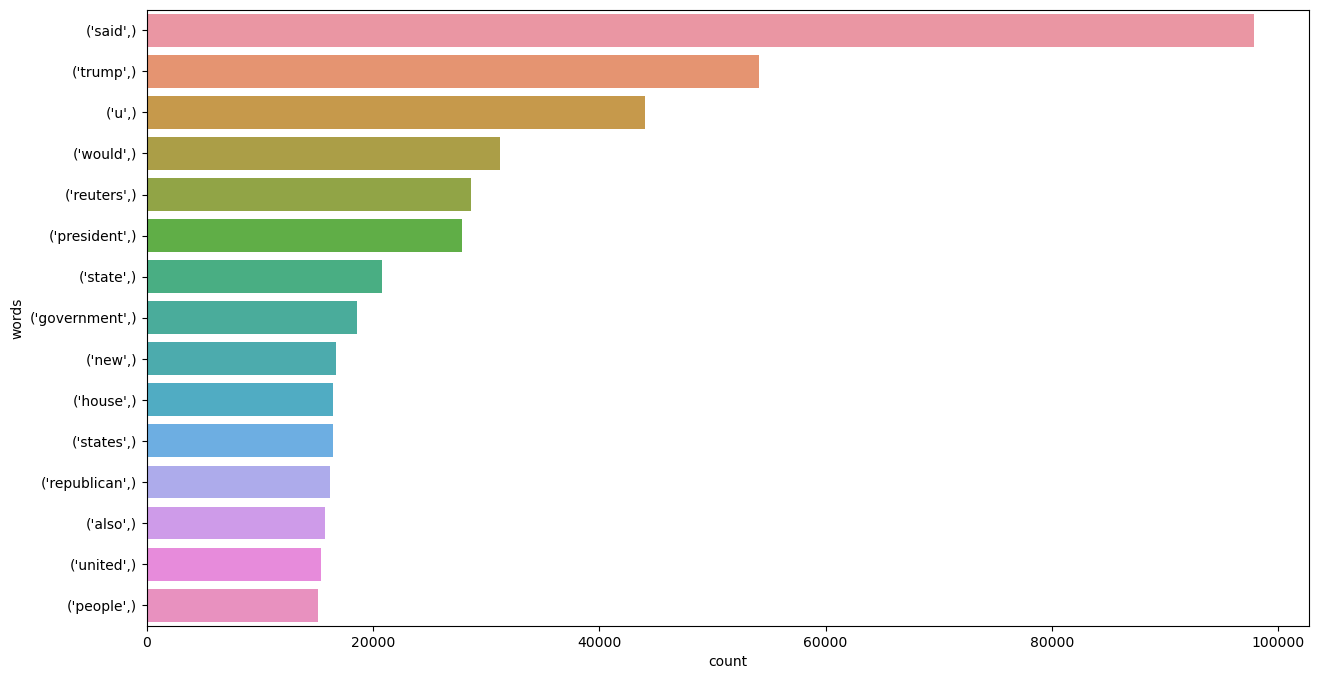

In [22]:
n_grams(string,1)

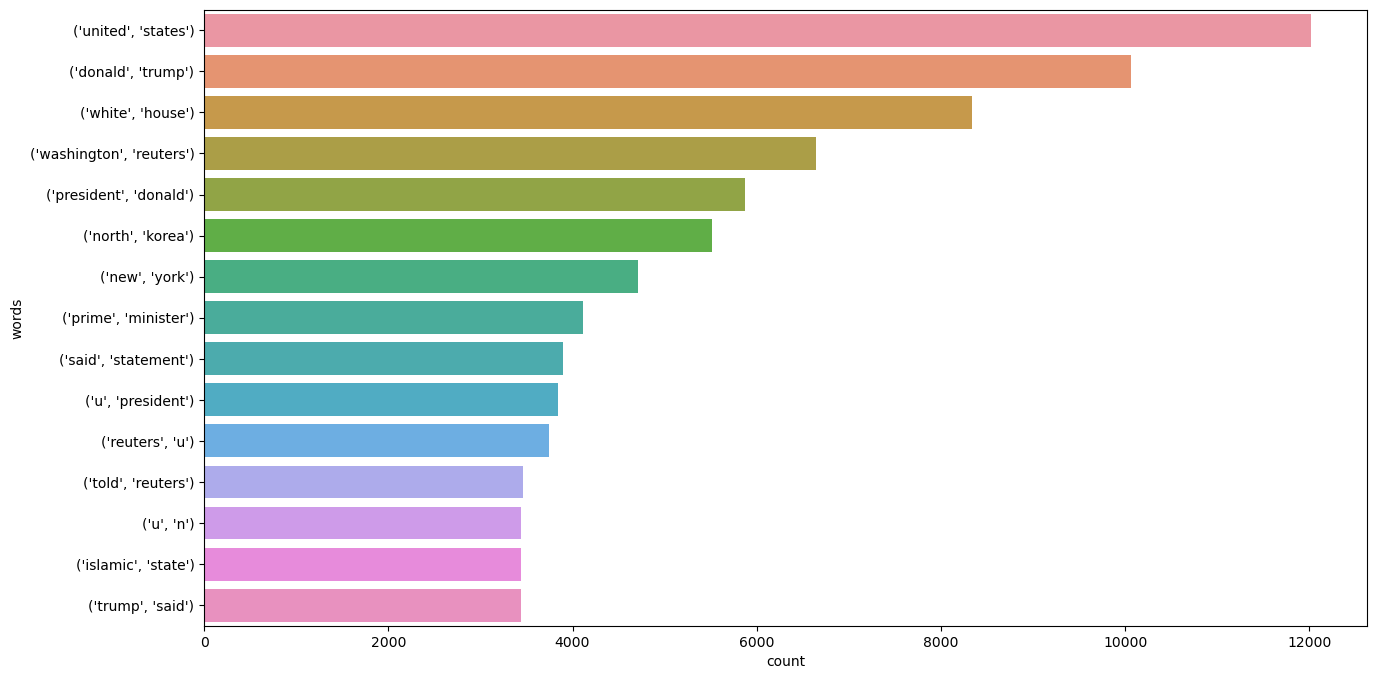

In [23]:
n_grams(string,2)

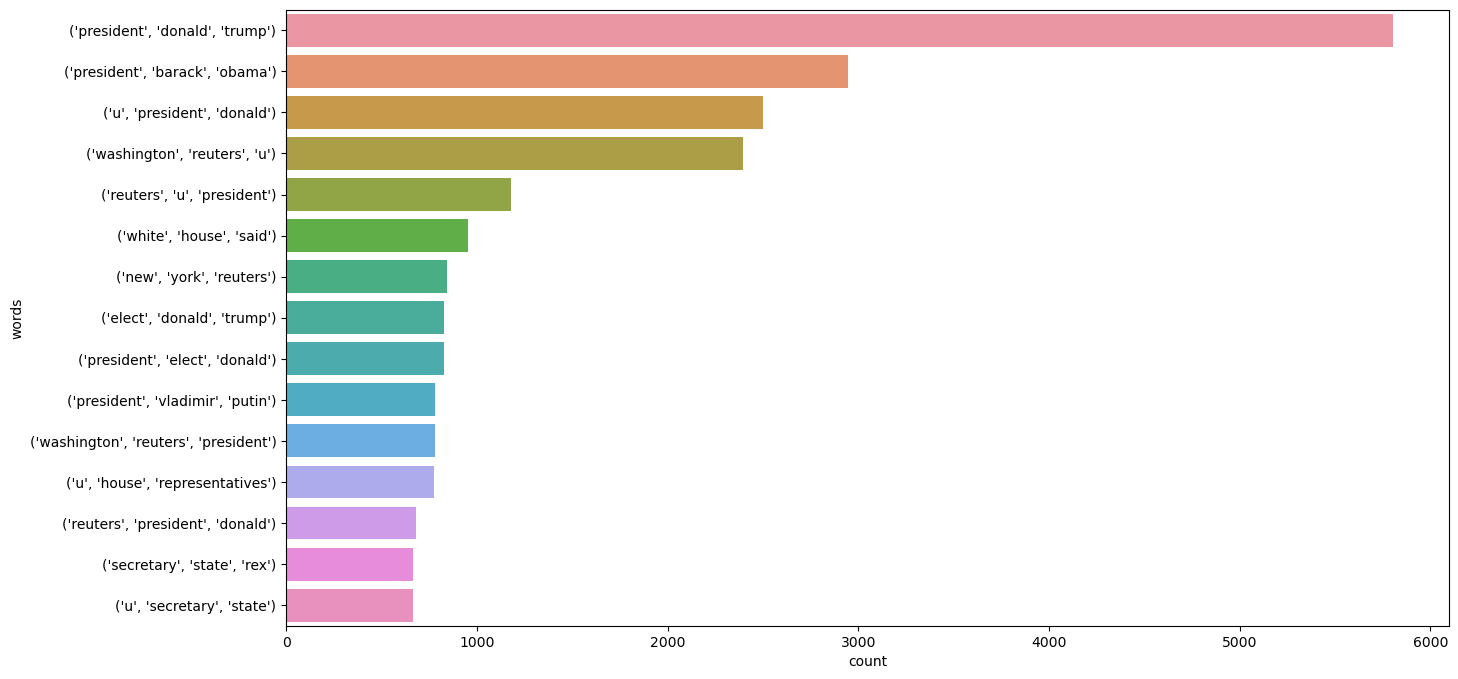

In [24]:
n_grams(string,3)

# Sentiment Analysis for Real Dataset

In [25]:
pip install textblob

In [26]:
from textblob import TextBlob

# Assuming you have a list of text data stored in a variable called 'text_data'

# Perform sentiment analysis on each text
sentiments = []
for text in real['tokenized_text']:
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    sentiments.append(sentiment)

# Classify sentiments as positive, negative, or neutral
positive_sentiments = sum(1 for sentiment in sentiments if sentiment > 0)
negative_sentiments = sum(1 for sentiment in sentiments if sentiment < 0)
neutral_sentiments = sum(1 for sentiment in sentiments if sentiment == 0)

# Print the sentiment analysis results
print("Positive Sentiments:", positive_sentiments)
print("Negative Sentiments:", negative_sentiments)
print("Neutral Sentiments:", neutral_sentiments)

Positive Sentiments: 15197
Negative Sentiments: 5414
Neutral Sentiments: 599


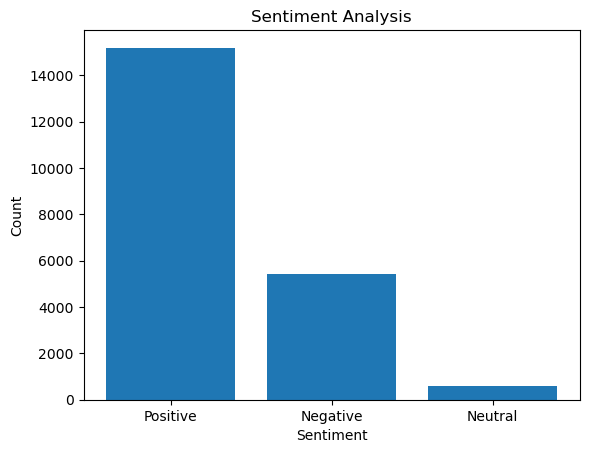

In [27]:
# Assume you have sentiment analysis results stored in variables
positive_sentiments = 15197
negative_sentiments = 5414
neutral_sentiments = 599

# Create labels for the sentiment categories
sentiment_labels = ['Positive', 'Negative', 'Neutral']

# Create values for the sentiment categories
sentiment_values = [positive_sentiments, negative_sentiments, neutral_sentiments]

# Create the bar graph
plt.bar(sentiment_labels, sentiment_values)

# Add a title to the graph
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Most Common Words for Real Dataset

In [28]:
import pandas as pd
from collections import Counter

# Assuming 'real' is the dataframe with 'tokenized_text' column
# Concatenate the tokenized text into a single string
concatenated_text = ' '.join(real['tokenized_text'])

# Tokenize the concatenated text into individual words
words = concatenated_text.split()

# Count the frequency of each word
word_freq = Counter(words)

# Print the most common words along with their frequencies
most_common_words = word_freq.most_common(10)  # Change the number as needed

for word, frequency in most_common_words:
    print(f"Word: {word}, Frequency: {frequency}")


Word: said, Frequency: 97866
Word: trump, Frequency: 54089
Word: u, Frequency: 44029
Word: would, Frequency: 31240
Word: reuters, Frequency: 28677
Word: president, Frequency: 27879
Word: state, Frequency: 20808
Word: government, Frequency: 18552
Word: new, Frequency: 16756
Word: house, Frequency: 16491


# Unique Words for Real Dataset

In [29]:
import pandas as pd
from collections import Counter

# Assuming 'real' is the dataframe with 'tokenized_text' column
# Concatenate the tokenized text into a single string
concatenated_text = ' '.join(real['tokenized_text'])

# Tokenize the concatenated text into individual words
words = concatenated_text.split()

# Get unique words using set
unique_words = set(words)

# Print the unique words
for word in unique_words:
    print(word)


reflections
bergen
thieving
haverbeck
harboured
detects
berlusca
gaulding
latterly
jerolinmek
mawio
slaying
placate
kachikwu
furthers
climaxing
chaung
insightcuba
thompson
deadly
regent
vilimsky
donuts
neudert
manzurul
reliability
raunchy
vitalis
sculptor
exacts
breaching
gamil
szatkowski
vegetables
injunctive
lajcak
archrival
confirm
tausch
nagako
clueless
appellants
eats
pearls
najuib
reds
momentum
petrified
cincinnnati
omits
defensible
farron
zurchin
kennebunkport
emocrat
sanitize
reyser
millimeter
lmt
pardavesh
yoshio
honshu
desirable
sloping
grudges
amozoc
reappointing
icj
trudged
naglick
bosses
unearthed
eidinger
pestminster
menu
alaodyi
noncitizens
bcf
billy
klux
layer
valerie
naranjo
chagrined
lourdes
inspect
autism
afbf
chopra
galvanize
compensated
cheung
penalosa
splc
reliant
brot
armchair
unprovable
denars
paragraphs
micronesia
wermuth
gravitation
relocate
axaf
grower
overseas
howled
eskelsen
ebikes
hopefully
r
fadli
crotty
foster
quyen
reformulation
turtschan
clunky
racks
a

wizner
rattling
littered
elie
beaner
meets
stonewalling
crime
tolerating
sirjan
novob
bratches
ciolos
scepticism
emasculate
limbaugh
emmert
wacky
helipad
soir
suction
irking
nadella
circumvented
vaught
cordani
pop
centric
stutzman
alwaystrump
alyssa
mucha
moskowitz
pardoned
conveniently
hudson
palatinate
bigots
frequents
zhzvaj
aab
yield
hassanal
goh
sbs
jaques
oridek
picture
unmatch
basilica
kasigye
stratosphere
rebelling
paces
overton
channeling
eliseu
amnon
stockholders
ulaanbaatar
onyeama
presupposes
bahr
stockroom
thoroughly
dried
zapad
mini
geared
centrifuge
schemes
sei
firewalls
jit
wollack
vociferous
solveable
quantities
transpired
confounding
alverez
emmer
thronged
grenell
rants
lenderking
plundered
oakley
buschmann
charitable
crab
plannedtakeover
oropeza
naivet
deco
unmanaged
belrtl
rebiya
glick
thornburg
ajcniq
kugelman
spectator
inflexibility
woolsey
overriding
normalization
veneer
dyad
marketed
uzbekistan
uthus
jeroen
framework
heath
lavar
map
kyong
boulaalam
confrontation

# Data Analysis for fake Dataset

In [30]:
fake_data.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamas Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [31]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [32]:
fake_data['Label'] = 0
fake_data.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamas Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  Label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0

In [33]:
fake_data.shape

(23481, 5)

In [34]:
fake_data.isnull().sum()

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

In [35]:
fake_data['Label'] = 0
fake_data.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamas Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  Label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0

In [36]:
fake_data.shape

(23481, 5)

In [37]:
fake_data.isnull().sum()

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

In [38]:
fake_data[fake_data.duplicated()]

title  \
9942   HILLARY TWEETS MESSAGE In Defense Of DACA&OOPS...   
11446  FORMER DEMOCRAT WARNS Young Americans: 
Rioter...   
14925  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...   

                                                    text   subject  \
9942   No time to waste   we've got to fight with eve...  politics   
11446   Who is silencing political speech, physically...  politics   
14925  They were probably just looking for a  safe sp...  politics   

               date  Label  
9942    Sep 9, 2017      0  
11446  Mar 10, 2017      0  
14925  Nov 16, 2015      0

In [39]:
# remove duplicates
fake_data.drop_duplicates(inplace=True)

In [40]:
fake_data.shape

(23478, 5)

In [41]:
fake = fake_data.drop(['title','subject','date'], axis = 1)
fake.head()

text  Label
0  Donald Trump just couldn t wish all Americans ...      0
1  House Intelligence Committee Chairman Devin Nu...      0
2  On Friday, it was revealed that former Milwauk...      0
3  On Christmas day, Donald Trump announced that ...      0
4  Pope Francis used his annual Christmas Day mes...      0

# Data Preprocessing for Fake Dataset

In [42]:
fake['text']=fake['text'].str.lower()

In [43]:
def clean_text(text):
    text = re.sub('@[\w]*', '', text)         # @
    text = re.sub("[0-9" "]+", '',text)       # no's
    text = re.sub('[‘’“”…]', '', text)       
    text = re.sub("\s+[a-z]\s+", " ",text)   #  a b c-----single letter
    text = re.sub("\W", " ", text)           #	*-+=)
    #text = re.sub('http[^\s]+', '',text)
    return text

clean = lambda x: clean_text(x)
fake["clean_text"] = fake["text"].apply(clean_text)

In [44]:
import nltk
nltk.download('punkt')  # You can remove this line if you already downloaded punkt before

text = "This is a sample sentence for tokenization."
tokens = nltk.word_tokenize(text)

print(tokens)


['This', 'is', 'a', 'sample', 'sentence', 'for', 'tokenization', '.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\finaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [45]:
# Tokenization
fake['tokenized_text'] = [nltk.word_tokenize(x) for x in fake['clean_text']]

#List of Stopwords
stop_words = list(set(stopwords.words('english')))

#Removing Stopwords
fake['tokenized_text'] = fake['tokenized_text'].apply(lambda row: [word for word in row if word not in stop_words])

#Stemming words
stemmer = PorterStemmer()
fake['stem_text'] = fake['tokenized_text'].apply(lambda x: [stemmer.stem(i) for i in x])
fake['stem_text'] = fake['stem_text'].apply(lambda x: ' '.join(x))
fake.head()

text  Label  \
0  donald trump just couldn t wish all americans ...      0   
1  house intelligence committee chairman devin nu...      0   
2  on friday, it was revealed that former milwauk...      0   
3  on christmas day, donald trump announced that ...      0   
4  pope francis used his annual christmas day mes...      0   

                                          clean_text  \
0  donald trump just couldn wish all americans ha...   
1  house intelligence committee chairman devin nu...   
2  on friday  it was revealed that former milwauk...   
3  on christmas day  donald trump announced that ...   
4  pope francis used his annual christmas day mes...   

                                      tokenized_text  \
0  [donald, trump, wish, americans, happy, new, y...   
1  [house, intelligence, committee, chairman, dev...   
2  [friday, revealed, former, milwaukee, sheriff,...   
3  [christmas, day, donald, trump, announced, wou...   
4  [pope, francis, used, annual, christmas, day, ...   

                                           stem_text  
0  donald trump wish american happi new year leav...  
1  hous intellig committe chairman devin nune go ...  
2  friday reveal former milwauke sheriff david cl...  
3  christma day donald trump announc would back w...  
4  pope franci use annual christma day messag reb...

In [46]:
import string

# Define a function to remove punctuation from a text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))


In [47]:
# Remove punctuation from 'stem_text' column
fake['stem_text'] = fake['stem_text'].apply(remove_punctuation)

# Display the updated DataFrame
print(fake.head())


                                                text  Label  \
0  donald trump just couldn t wish all americans ...      0   
1  house intelligence committee chairman devin nu...      0   
2  on friday, it was revealed that former milwauk...      0   
3  on christmas day, donald trump announced that ...      0   
4  pope francis used his annual christmas day mes...      0   

                                          clean_text  \
0  donald trump just couldn wish all americans ha...   
1  house intelligence committee chairman devin nu...   
2  on friday  it was revealed that former milwauk...   
3  on christmas day  donald trump announced that ...   
4  pope francis used his annual christmas day mes...   

                                      tokenized_text  \
0  [donald, trump, wish, americans, happy, new, y...   
1  [house, intelligence, committee, chairman, dev...   
2  [friday, revealed, former, milwaukee, sheriff,...   
3  [christmas, day, donald, trump, announced, wou...   
4  [

# Generate wordcloud for fake Dataset

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\finaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\finaz\AppData\Local\Temp\ipykernel_19428\651649627.py:12: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('Fake.csv', encoding='ISO-8859-1', error_bad_lines=False)


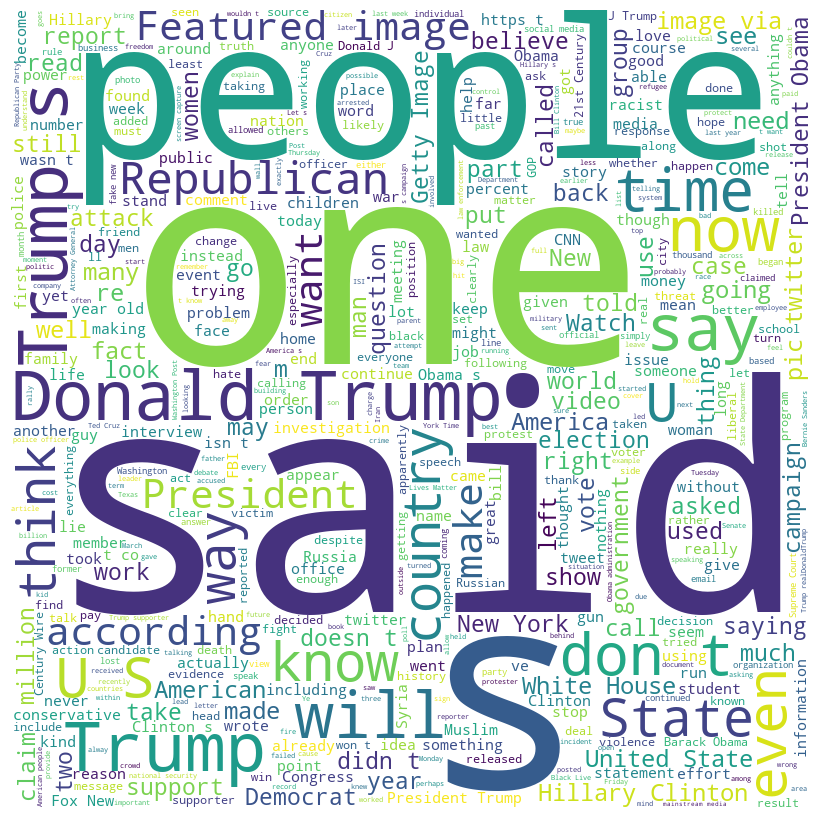

In [48]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from nltk.corpus import stopwords
nltk.download('stopwords')

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('Fake.csv', encoding='ISO-8859-1', error_bad_lines=False)


# Clean the data if needed (you can define a function for data cleaning)
def clean_data(text):
    # Your cleaning process here
    return text

fake['text'] = fake['text'].apply(clean_data)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=500).generate(' '.join(df['text']))

# Plot the WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# N-gram for Fake Dataset

In [49]:
# Function to generate N-grams
def generate_ngrams(text, n):
    words = word_tokenize(text)
    n_grams = ngrams(words, n)
    return [' '.join(grams) for grams in n_grams]

# Create a list of stop words
stop_words = set(stopwords.words('english'))

# Assuming 'real' is the dataframe with 'tokenized_text' column
fake['tokenized_text'] = fake['tokenized_text'].apply(lambda lst: [word.lower() for word in lst])
# Convert text to lowercase

fake['tokenized_text'] = fake['tokenized_text'].apply(lambda x: ' '.join(x))
# Join the list of words back into a single string

fake['tokenized_text'] = fake['tokenized_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
# Remove stopwords

unigrams = fake['tokenized_text'].apply(lambda x: generate_ngrams(x, 1))
bigrams = fake['tokenized_text'].apply(lambda x: generate_ngrams(x, 2))
trigrams = fake['tokenized_text'].apply(lambda x: generate_ngrams(x, 3))

unigram_freq = Counter([gram for sublist in unigrams for gram in sublist])
bigram_freq = Counter([gram for sublist in bigrams for gram in sublist])
trigram_freq = Counter([gram for sublist in trigrams for gram in sublist])

# Print N-gram frequencies
print("Unigram Frequencies:", unigram_freq.most_common(10))
print("Bigram Frequencies:", bigram_freq.most_common(10))
print("Trigram Frequencies:", trigram_freq.most_common(10))


Unigram Frequencies: [('trump', 79804), ('said', 33762), ('president', 27803), ('people', 26589), ('one', 24586), ('would', 23565), ('clinton', 19206), ('obama', 18835), ('like', 18115), ('donald', 17780)]
Bigram Frequencies: [('donald trump', 14255), ('featured image', 8053), ('hillary clinton', 7269), ('white house', 6744), ('united states', 6662), ('twitter com', 6567), ('image via', 6327), ('pic twitter', 6185), ('new york', 4359), ('president obama', 4091)]
Trigram Frequencies: [('pic twitter com', 6185), ('featured image via', 6018), ('donald j trump', 2135), ('st century wire', 1924), ('new york times', 1569), ('black lives matter', 1306), ('president united states', 1008), ('president donald trump', 958), ('president barack obama', 947), ('news st century', 943)]


In [50]:
# We first adapt the text splitting it into words
string_pre = ' '.join(fake['tokenized_text'])
string = string_pre.split(" ")

In [51]:
def n_grams(string, n, values=15):
    n_gram = (pd.Series(nltk.ngrams(string, n)).value_counts())[:values]
    n_gram_data = pd.DataFrame(n_gram)
    n_gram_data = n_gram_data.reset_index()
    n_gram_data = n_gram_data.rename(columns={"index": "words", 0: "count"})
    
    # Convert 'count' column to numeric data type
    n_gram_data['count'] = n_gram_data['count'].astype(int)
    
    plt.figure(figsize=(15, 8))
    sns.barplot(x='count', y='words', data=n_gram_data)
    plt.show()


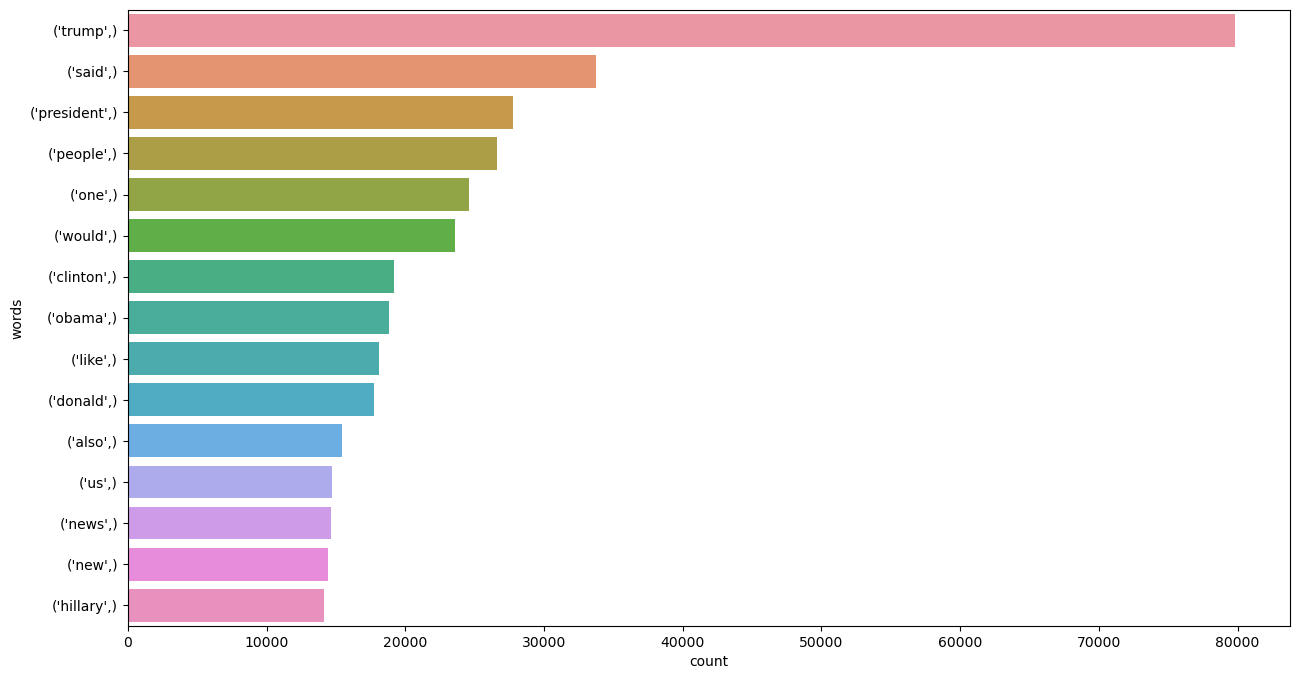

In [52]:
n_grams(string,1)

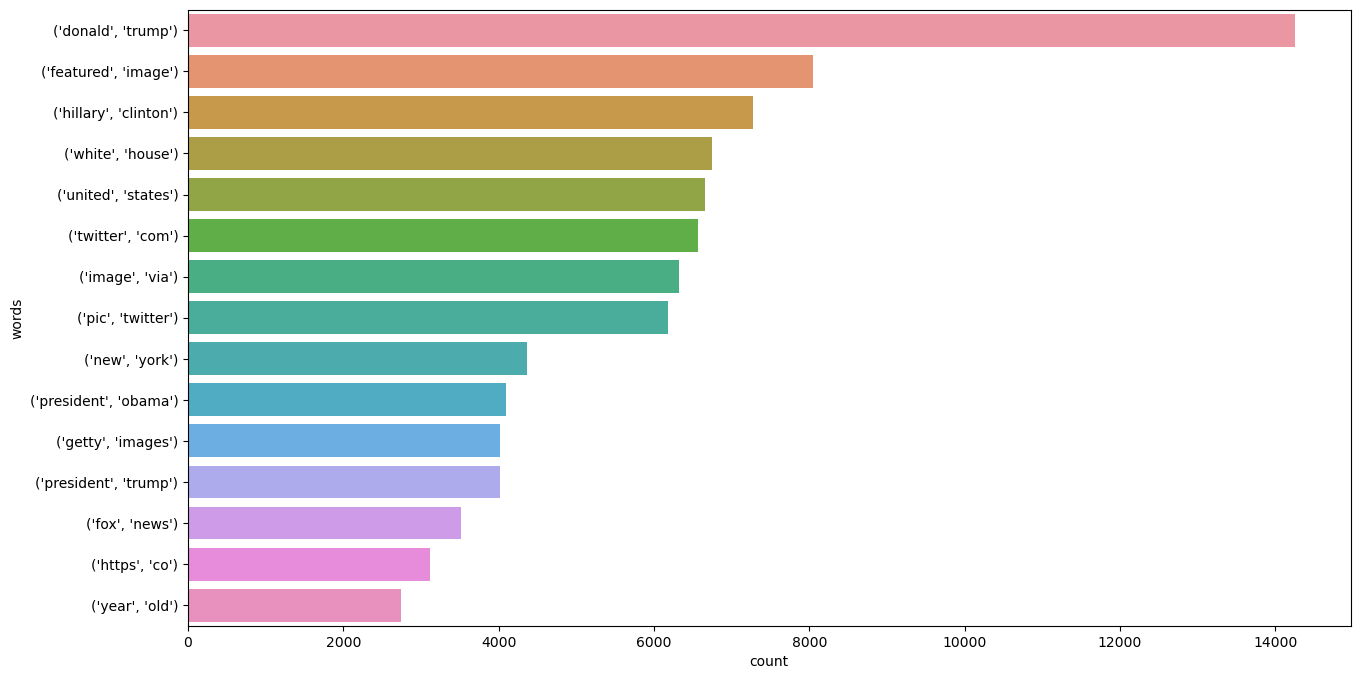

In [53]:
n_grams(string,2)

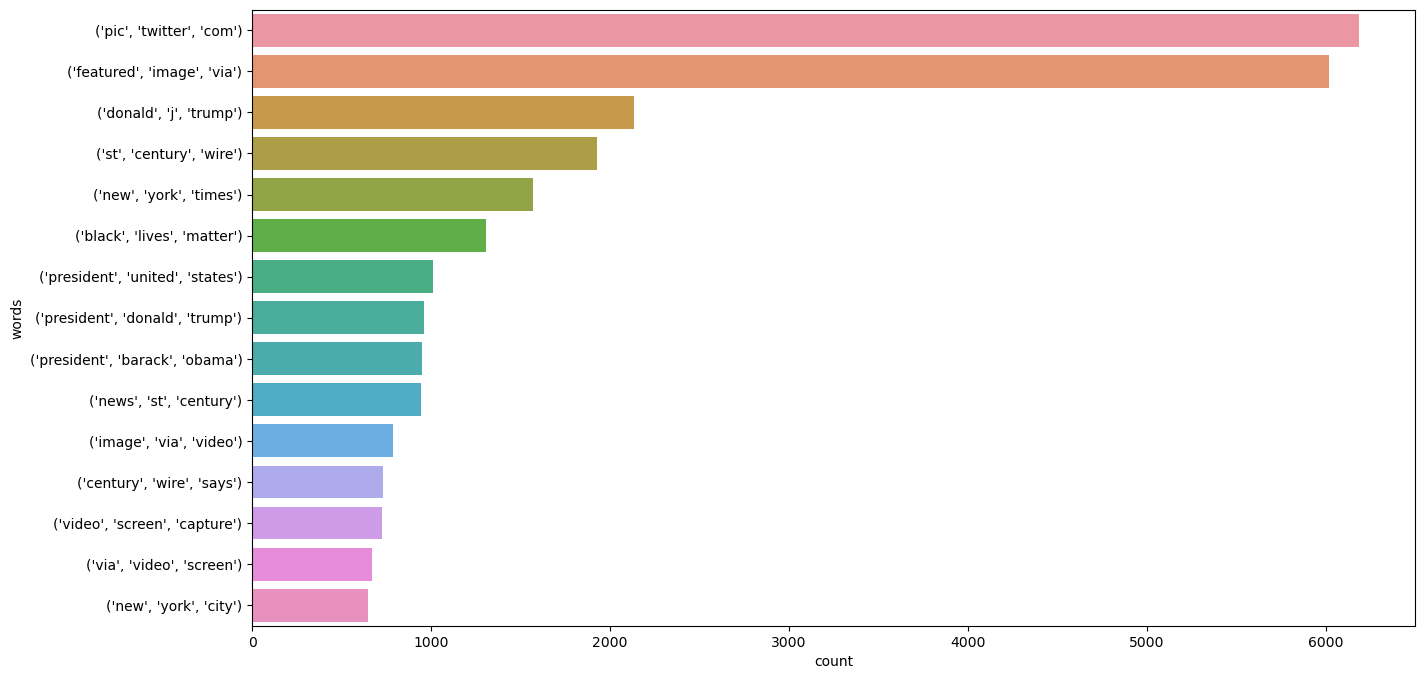

In [54]:
n_grams(string,3)

# Sentiment Analysis for Fake Dataset

In [55]:
from textblob import TextBlob

# Assuming you have a list of text data stored in a variable called 'text_data'

# Perform sentiment analysis on each text
sentiments = []
for text in fake['tokenized_text']:
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    sentiments.append(sentiment)

# Classify sentiments as positive, negative, or neutral
positive_sentiments = sum(1 for sentiment in sentiments if sentiment > 0)
negative_sentiments = sum(1 for sentiment in sentiments if sentiment < 0)
neutral_sentiments = sum(1 for sentiment in sentiments if sentiment == 0)

# Print the sentiment analysis results
print("Positive Sentiments:", positive_sentiments)
print("Negative Sentiments:", negative_sentiments)
print("Neutral Sentiments:", neutral_sentiments)

Positive Sentiments: 15823
Negative Sentiments: 6566
Neutral Sentiments: 1089


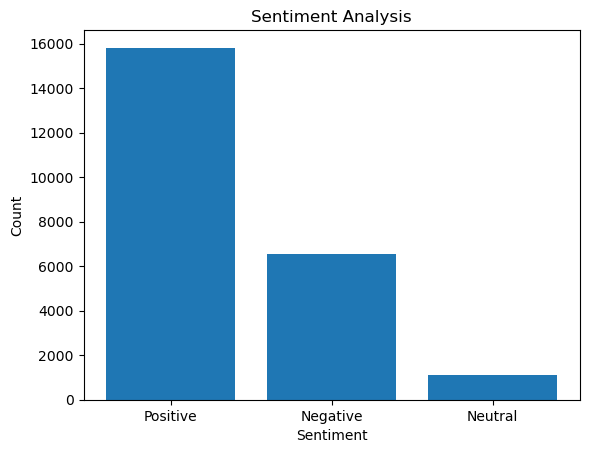

In [56]:
# Assume you have sentiment analysis results stored in variables
positive_sentiments = 15823
negative_sentiments = 6566
neutral_sentiments = 1089

# Create labels for the sentiment categories
sentiment_labels = ['Positive', 'Negative', 'Neutral']

# Create values for the sentiment categories
sentiment_values = [positive_sentiments, negative_sentiments, neutral_sentiments]

# Create the bar graph
plt.bar(sentiment_labels, sentiment_values)

# Add a title to the graph
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Most Common Words for Fake Dataset

In [57]:
import pandas as pd
from collections import Counter

# Assuming 'real' is the dataframe with 'tokenized_text' column
# Concatenate the tokenized text into a single string
concatenated_text = ' '.join(fake['tokenized_text'])

# Tokenize the concatenated text into individual words
words = concatenated_text.split()

# Count the frequency of each word
word_freq = Counter(words)

# Print the most common words along with their frequencies
most_common_words = word_freq.most_common(10)  # Change the number as needed

for word, frequency in most_common_words:
    print(f"Word: {word}, Frequency: {frequency}")


Word: trump, Frequency: 79804
Word: said, Frequency: 33762
Word: president, Frequency: 27803
Word: people, Frequency: 26589
Word: one, Frequency: 24586
Word: would, Frequency: 23565
Word: clinton, Frequency: 19206
Word: obama, Frequency: 18835
Word: like, Frequency: 18115
Word: donald, Frequency: 17780


# Unique Words for Fake Dataset

In [58]:
import pandas as pd
from collections import Counter

# Assuming 'real' is the dataframe with 'tokenized_text' column
# Concatenate the tokenized text into a single string
concatenated_text = ' '.join(real['tokenized_text'])

# Tokenize the concatenated text into individual words
words = concatenated_text.split()

# Get unique words using set
unique_words = set(words)

# Print the unique words
for word in unique_words:
    print(word)


reflections
bergen
thieving
haverbeck
harboured
detects
berlusca
gaulding
latterly
jerolinmek
mawio
slaying
placate
kachikwu
furthers
climaxing
chaung
insightcuba
thompson
deadly
regent
vilimsky
donuts
neudert
manzurul
reliability
raunchy
vitalis
sculptor
exacts
breaching
gamil
szatkowski
vegetables
injunctive
lajcak
archrival
confirm
tausch
nagako
clueless
appellants
eats
pearls
najuib
reds
momentum
petrified
cincinnnati
omits
defensible
farron
zurchin
kennebunkport
emocrat
sanitize
reyser
millimeter
lmt
pardavesh
yoshio
honshu
desirable
sloping
grudges
amozoc
reappointing
icj
trudged
naglick
bosses
unearthed
eidinger
pestminster
menu
alaodyi
noncitizens
bcf
billy
klux
layer
valerie
naranjo
chagrined
lourdes
inspect
autism
afbf
chopra
galvanize
compensated
cheung
penalosa
splc
reliant
brot
armchair
unprovable
denars
paragraphs
micronesia
wermuth
gravitation
relocate
axaf
grower
overseas
howled
eskelsen
ebikes
hopefully
r
fadli
crotty
foster
quyen
reformulation
turtschan
clunky
racks
a

spots
detoxes
hostility
fizzle
puritanism
frank
ozone
dickson
incontestably
poulin
rifi
loitering
chemists
coexistence
wrist
registry
schuette
shades
lynchpin
hutchison
sculptural
rarity
ryong
bridled
villagers
buale
lamar
oud
militiaman
bhppax
illuminates
tae
elf
sewer
cheapens
valuing
kataeb
cmc
licensed
colo
hostetler
administered
wisniewski
fraudulently
beto
rigs
chady
sandbags
nejm
retiree
moberg
enright
brattenberg
rajapaksa
siriraj
bedoui
none
nairobi
delving
schneier
res
rees
forbearance
assailed
tsveta
extraction
ahrar
landmass
manriquez
whelan
blood
beat
countered
donnell
famously
zadrozny
buffeted
noise
uzhunnalil
wollaston
adamson
noisily
adoptive
titular
beefed
diani
paine
thrusts
opsm
masterminding
spillovers
supermajority
kurz
grisham
continents
linguissara
baller
szep
disguising
rockwall
anse
prout
skeletons
xenophobe
shoket
sufficiently
heed
mantap
rife
loud
soukkala
spokespeople
felon
helmeted
camp
philly
leaders
saddle
freighters
iglesias
amrullah
demonstrate
richie


fahmi
yawning
salehi
olson
upper
urges
miners
rubik
ashley
keeler
doklam
tobruk
hend
kerfuffle
loosing
mceachin
monetize
landscaper
woolfe
figueredo
pacific
constructed
langthorn
pervasive
taxi
claver
sese
stepped
cop
wirelessly
studied
questioned
giancamilli
youxia
despised
lueck
laxatives
qfwvsl
blankfein
defuses
excrement
ngutai
approvals
ishmael
distances
buttressed
shand
destroyers
jefrey
admired
vector
sido
proclamations
aerospace
sonora
complication
version
ishihara
rupiah
seeks
typify
duties
fb
jkkvnt
spouts
bergamo
daqing
charade
psychologically
nebraska
timo
fermanagh
overblown
regency
heriansyah
baida
regrettable
occupancy
eca
pv
interlocutor
surfeit
midtown
bae
fayettsville
tomomi
dlamini
dambatta
emissions
hobby
ihsaan
sutton
vacationing
coapa
windfalls
polluted
reorient
kantar
ingenuity
engholm
indra
pepsico
plunging
sops
eroded
ackman
tannenbaum
apparatus
ashworth
melts
sachdeva
hellman
car
bukhari
hussainya
perpetuate
affiliation
frankie
antidumping
figured
baskets
land

# Feature Engineering

## Merge both real & fake dataset

In [59]:
#Merging the 2 datasets
merg_data = pd.concat([real, fake], axis=0,ignore_index = True)
merg_data.head()

text  Label  \
0  washington (reuters) - the head of a conservat...      1   
1  washington (reuters) - transgender people will...      1   
2  washington (reuters) - the special counsel inv...      1   
3  washington (reuters) - trump campaign adviser ...      1   
4  seattle/washington (reuters) - president donal...      1   

                                          clean_text  \
0  washington  reuters    the head of conservativ...   
1  washington  reuters    transgender people will...   
2  washington  reuters    the special counsel inv...   
3  washington  reuters    trump campaign adviser ...   
4  seattle washington  reuters    president donal...   

                                      tokenized_text  \
0  washington reuters head conservative republica...   
1  washington reuters transgender people allowed ...   
2  washington reuters special counsel investigati...   
3  washington reuters trump campaign adviser geor...   
4  seattle washington reuters president donald tr...   

                                           stem_text  
0  washington reuter head conserv republican fact...  
1  washington reuter transgend peopl allow first ...  
2  washington reuter special counsel investig lin...  
3  washington reuter trump campaign advis georg p...  
4  seattl washington reuter presid donald trump c...

In [60]:
# Creating new column with reuters word
merg_data['Reuters_present'] = merg_data['text'].str.contains(r'\(reuters\)')
merg_data['Reuters_present'].value_counts()

False    23639
True     21049
Name: Reuters_present, dtype: int64

In [61]:
pd.crosstab(merg_data['Label'],merg_data['Reuters_present'])

Reuters_present  False   True
Label                        
0                23469      9
1                  170  21040

In [62]:
merg_data.columns

Index(['text', 'Label', 'clean_text', 'tokenized_text', 'stem_text',
       'Reuters_present'],
      dtype='object')

# TF-IDF vectorization technique

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features

# Apply the vectorizer on the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(merg_data['stem_text'])

# Convert the TF-IDF matrix to a dense array
tfidf_features = tfidf_matrix.toarray()

# Now you can use tfidf_features for your analysis


In [64]:
# Feature and target column
X = tfidf_features
y = merg_data['Label']

In [65]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Building for TF-IDF

## Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

# Assuming you've already defined X_train, y_train, X_test, and y_test

# Create a LogisticRegression object
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Calculate the accuracy score on the test data
accuracy = log_reg.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9871335869321995


In [67]:
# Make predictions on the test data
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Accuracy: 0.9871335869321995


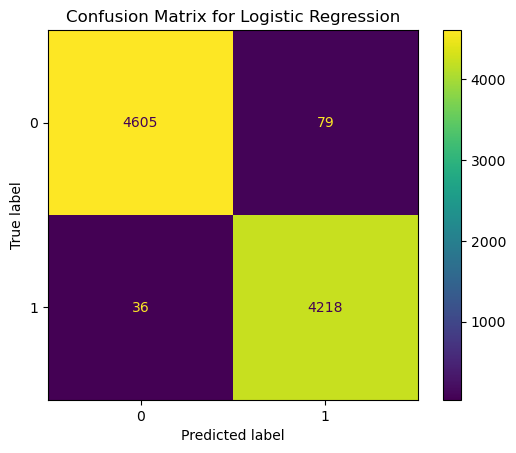

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Assuming you've already defined X_train, y_train, X_test, and y_test

# Create a LogisticRegression object
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Calculate the accuracy score on the test data
accuracy = log_reg.score(X_test, y_test)
print("Accuracy:", accuracy)

# Generate confusion matrix and display it
y_pred = log_reg.predict(X_test)
confu = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confu, display_labels=[0, 1])
cm_display.plot()

# Additional code
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


In [69]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression  # Assuming you have imported LogisticRegression

# Define your logistic regression model (log_reg) and your data (X_train, y_train) here

# Using kfold-cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(log_reg, X_train, y_train, cv=kfold, scoring='accuracy')
print("Cross-validated accuracy scores:", scores)


Cross-validated accuracy scores: [0.98265734 0.98713287 0.98265734 0.9827972  0.98475524]


In [70]:
print("Mean accuracy score:", np.mean(scores))

Mean accuracy score: 0.984


In [71]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4684
           1       0.98      0.99      0.99      4254

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



# Naive Bayes

In [72]:
from sklearn.naive_bayes import MultinomialNB

#Initialising a naive bayes classifier
nb = MultinomialNB()

#Fitting the model on train data
nb.fit(X_train,y_train)

#Finding the accuracy score of model on test data
nb_acc = nb.score(X_test, y_test)
print(nb_acc)


0.9278362049675543


# SVM

In [73]:
from sklearn.svm import SVC

#Initialising a support vector model with linear kernel
svc = SVC(kernel="linear", random_state=0)

#Fitting the model on train data
svc.fit(X_train,y_train)

#Finding the accuracy score of the model on test data
svc_score = svc.score(X_test,y_test)
print(svc_score)

0.9921682703065563


<Figure size 800x600 with 0 Axes>

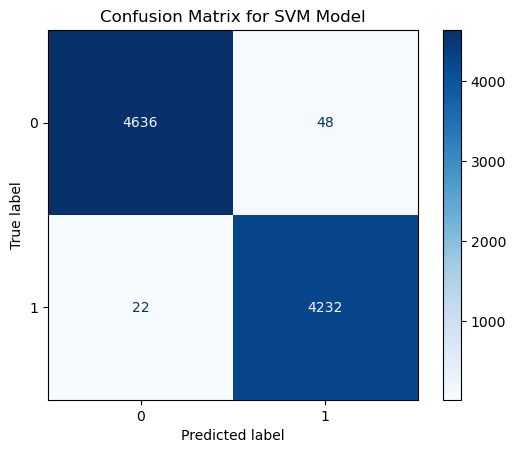

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Assuming you have your data loaded and preprocessed as X and y
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialising a support vector model with linear kernel
svc = SVC(kernel="linear", random_state=0)

# Fitting the model on train data
svc.fit(X_train, y_train)

# Making predictions on the test data
y_pred = svc.predict(X_test)

# Calculating confusion matrix
confu = metrics.confusion_matrix(y_test, y_pred)

# Creating confusion matrix display
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confu, display_labels=svc.classes_)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM Model")
plt.show()


In [75]:
# Make predictions on the test data
y_pred = svc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC

# Assuming you have defined X_train and y_train

# Create an SVM classifier
svc = SVC()

# Using kfold-cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svc, X_train, y_train, cv=kfold, scoring='accuracy')

print("Cross-validated accuracy scores:", scores)

Cross-validated accuracy scores: [0.99216783 0.99342657 0.99076923 0.98951049 0.99370629]


In [77]:
print("Mean accuracy score:", np.mean(scores))

Mean accuracy score: 0.991916083916084


In [78]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4684
           1       0.99      0.99      0.99      4254

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



In [79]:
# Combining all Models accuracies and forming Dataframe
final_data_acc = pd.DataFrame({'Models':['LogisticRegression','NaiveBayes','SVM'],
                              'Accuracy': [accuracy*100,nb_acc*100,svc_score*100]})
final_data_acc

Models   Accuracy
0  LogisticRegression  98.713359
1          NaiveBayes  92.783620
2                 SVM  99.216827

# Word2Vec

In [80]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [81]:
from gensim.models import Word2Vec

In [82]:
from gensim.models import Word2Vec

# Train the Word2Vec model with vector_size=1000
model = Word2Vec(sentences=merg_data['tokenized_text'], vector_size=1000, window=5)

# Save the trained model
model.save("word2vec_model_1000d.bin")


# Model Building with Word2Vec

# Logistic Regression

In [83]:
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming you have your 'merg_data' data and 'tokenized_text' column

# Train the Word2Vec model
model = Word2Vec(sentences=merg_data['tokenized_text'], vector_size=1000, window=5)
# Save the trained model
model.save("word2vec_model_1000d.bin")

# Create a function to get the document vector (average of word vectors)
def get_doc_vector(doc):
    doc_vector = np.zeros(1000)  # Assuming vector_size is 1000
    num_words = 0
    for word in doc:
        if word in model.wv:
            doc_vector += model.wv[word]
            num_words += 1
    if num_words > 0:
        doc_vector /= num_words
    return doc_vector

# Create document vectors for each news article
merg_data['doc_vector'] = merg_data['tokenized_text'].apply(get_doc_vector)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(merg_data['doc_vector'], merg_data['Label'], test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train.tolist(), y_train)

# Predict on the test set
y_pred = logreg.predict(X_test.tolist())

# Calculate accuracy
accuracy_LR = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_LR}")


Accuracy: 0.7625867084358917


# SVM

In [84]:
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the trained Word2Vec model
model = Word2Vec.load("word2vec_model_1000d.bin")

# Create a function to get the document vector (average of word vectors)
def get_doc_vector(doc):
    doc_vector = np.zeros(1000)  # Assuming vector_size is 1000
    num_words = 0
    for word in doc:
        if word in model.wv:
            doc_vector += model.wv[word]
            num_words += 1
    if num_words > 0:
        doc_vector /= num_words
    return doc_vector

# Create document vectors for each news article
merg_data['doc_vector'] = merg_data['tokenized_text'].apply(get_doc_vector)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(merg_data['doc_vector'], merg_data['Label'], test_size=0.2, random_state=42)

# Initialize and train the SVM model
svc = SVC(kernel='linear', random_state=42)
svc.fit(list(X_train), y_train)

# Predict on the test set
y_pred = svc.predict(list(X_test))

# Calculate accuracy
accuracy_SVM = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_SVM}")


Accuracy: 0.7706422018348624


In [85]:
# Combining all Models accuracies and forming Dataframe
final_data_we = pd.DataFrame({'Models':['LogisticRegression','SVM'],
                              'Accuracy': [accuracy_LR*100,accuracy_SVM*100]})
final_data_we

Models   Accuracy
0  LogisticRegression  76.258671
1                 SVM  77.064220

# Result : Logistic Regression gives the best accuracy by using TF-IDF

# Model Deployment

In [86]:
import pandas as pd
import re
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

data_fake = pd.read_csv('Fake.csv', encoding='latin-1', on_bad_lines='skip')
data_true = pd.read_csv('True.csv', encoding='latin-1', on_bad_lines='skip')
data_fake['Label'] = 0
data_true['Label'] = 1
data = pd.concat([data_true, data_fake], axis=0, ignore_index=True)
data.head()
import string
import re


def wordopt(text):
    text = text.lower()  # lower case
    text = re.sub('\[.*?\]', '', text)  # remove anything with and within brackets
    text = re.sub('\\W', ' ', text)  # removes any character not a letter, digit, or underscore
    text = re.sub('https?://\S+|www\.\S+', '', text)  # removes any links starting with https
    text = re.sub('<.*?>+', '', text)  # removes anything with and within < >
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # removes any string with % in it
    text = re.sub('\n', '', text)  # remove next lines
    text = re.sub('\w*\d\w*', '', text)  # removes any string that contains atleast a digit with zero or more characters
    return text
    data['text'] = data['text'].apply(wordopt)


x = data['text']
y = data['Label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
LR = LogisticRegression()
LR.fit(xv_train, y_train)

# website
import streamlit as st
st.title('Fake And True News Prediction')
st.image('Fake_News_Detection_Project.png', use_column_width=True)
input_text = st.text_input('Enter news Article')


def prediction(input_text):
    input_data = vectorization.transform([input_text])
    prediction = LR.predict(input_data)
    return prediction[0]


if st.button("Predict"):
 if input_text:
    pred = prediction(input_text)
    if pred == 1:
        st.write('The news is True')
    else:
        st.write('The news is Fake')

2023-08-09 14:42:33.904 
  command:

    streamlit run C:\Users\finaz\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
